In [ ]:
from util import fisherztrans,stat_m_e,pair_test,sig,color_inv_alpha
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import seaborn as sns
from faceprf_figure_function import set_figure,set_ax,myviolinplot_ind,myviolinplot_pair
import pingouin

cms=np.array([[255, 195, 73],[145, 115, 185]])/255

nsubj = 8
npos = 16
task = ['Digit Task','Face Task']
roi_labels = ['V1','V2','V3','hV4','IOG','pFus','mFus']
nroi = len(roi_labels)
ntask = len(task)
# distance: near vs. far
num_nf=[[0,4],[5,9]]
nf = ['Near','Far']
# roi: early visual cortex (V1-V3) - face-selective region
num_vf=[[0,3],[4,7]]
vf = ['V1-V3','OFA,FFA-1,FFA-2']
nsample2 = nsubj * np.max(np.diff(num_nf)) * np.max(np.diff(num_vf))
nvertex = 100


data_path = "../data/"

### Covariance
***squared projected signal***:$ \ \ (\frac{df}{|df|}\cdot\xi_i)^2$

***PC Variance***:$\ \ \lambda_i$

***information on each dimension***: $ \ \ \frac{(\frac{df}{|df|}\cdot\xi_i)^2}{\lambda_i}$

***cumulative information***: $\ \ \sum_i^{PC}\frac{(\frac{df}{|df|}\cdot\xi_i)^2}{\lambda_i}$



In [2]:
snanglecos2_d_subj = np.load(data_path+'snanglecos2.npz',allow_pickle=True)['snanglecos2_d_subj'] 
snanglecos2_nf_subj = np.zeros([nvertex,4*nsubj,len(roi_labels),ntask,len(nf)])*np.nan # npc x 4*8samples x roi x task x nf 
for task_i in range(ntask):
    for roi_i in range(len(roi_labels)):
        for i in range(len(num_nf)):
            for ipc in range(nvertex):
                data = snanglecos2_d_subj[ipc,num_nf[i][0]:num_nf[i][1],:,roi_i,task_i]
                snanglecos2_nf_subj[ipc,:,roi_i,task_i,i] = data.reshape([data.shape[0]*data.shape[1]])                
snanglecos2_nf_subj[:,:,:,[0,1],:] = snanglecos2_nf_subj[:,:,:,[1,0],:]

pcvi_d_subj = np.load(data_path+'cwangle.npz',allow_pickle=True)['pcvi_d_subj'] # nvertex x d x subj x roi x task
pcvi_nf_subj = np.zeros([nvertex,4*nsubj,nroi,ntask,len(nf)])*np.nan # nvertex x 4*8samples x roi x task x nf
for task_i in range(ntask):
    for roi_i in range(nroi):
        for i in range(len(num_nf)):
            data = pcvi_d_subj[:,num_nf[i][0]:num_nf[i][1],:,roi_i,task_i]
            pcvi_nf_subj[:,:,roi_i,task_i,i] = data.reshape([data.shape[0],data.shape[1]*data.shape[2]])
pcvi_nf_subj[:,:,:,[0,1],:] = pcvi_nf_subj[:,:,:,[1,0],:]

sn_d_subj = np.load(data_path+'sn.npz',allow_pickle=True)['sn_d_subj']
sn_nf_subj = np.zeros([nvertex,4*nsubj,len(roi_labels),ntask,len(nf)])*np.nan # npc x 4*8samples x roi x task x nf 
for task_i in range(ntask):
    for roi_i in range(len(roi_labels)):
        for i in range(len(num_nf)):
            for ipc in range(nvertex):
                data = sn_d_subj[ipc,num_nf[i][0]:num_nf[i][1],:,roi_i,task_i]
                sn_nf_subj[ipc,:,roi_i,task_i,i] = data.reshape([data.shape[0]*data.shape[1]])
sn_nf_subj[:,:,:,[0,1],:] = sn_nf_subj[:,:,:,[1,0],:]

sncum_d_subj = np.load(data_path+'sn.npz',allow_pickle=True)['sncum_d_subj']
sncum_nf_subj = np.zeros([nvertex,4*nsubj,len(roi_labels),ntask,len(nf)])*np.nan # npc x 4*8samples x roi x task x nf 
for task_i in range(ntask):
    for roi_i in range(len(roi_labels)):
        for i in range(len(num_nf)):
            for ipc in range(nvertex):
                data = sncum_d_subj[ipc,num_nf[i][0]:num_nf[i][1],:,roi_i,task_i]
                sncum_nf_subj[ipc,:,roi_i,task_i,i] = data.reshape([data.shape[0]*data.shape[1]])
sncum_nf_subj[:,:,:,[0,1],:] = sncum_nf_subj[:,:,:,[1,0],:]

roi_sel = [1,6]
nf_i = 1

data_all = np.zeros([4*nsubj,nvertex,ntask,len(roi_sel),4]) # 4*8samples x npc x 2task x nroi x 4indice
for j in range(len(roi_sel)):
    roi_i = roi_sel[j]
    data_all[:,:,:,j,0] = snanglecos2_nf_subj[:,:,roi_i,:,nf_i].transpose([1,0,2])
    data_all[:,:,:,j,1] = pcvi_nf_subj[:,:,roi_i,:,nf_i].transpose([1,0,2])
    data_all[:,:,:,j,2] = sn_nf_subj[:,:,roi_i,:,nf_i].transpose([1,0,2])
    data_all[:,:,:,j,3] = sncum_nf_subj[:,:,roi_i,:,nf_i].transpose([1,0,2])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_85920\9246275.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('fig7.pdf', bbox_inches='tight')
d:\MySoftwares\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
d:\MySoftwares\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


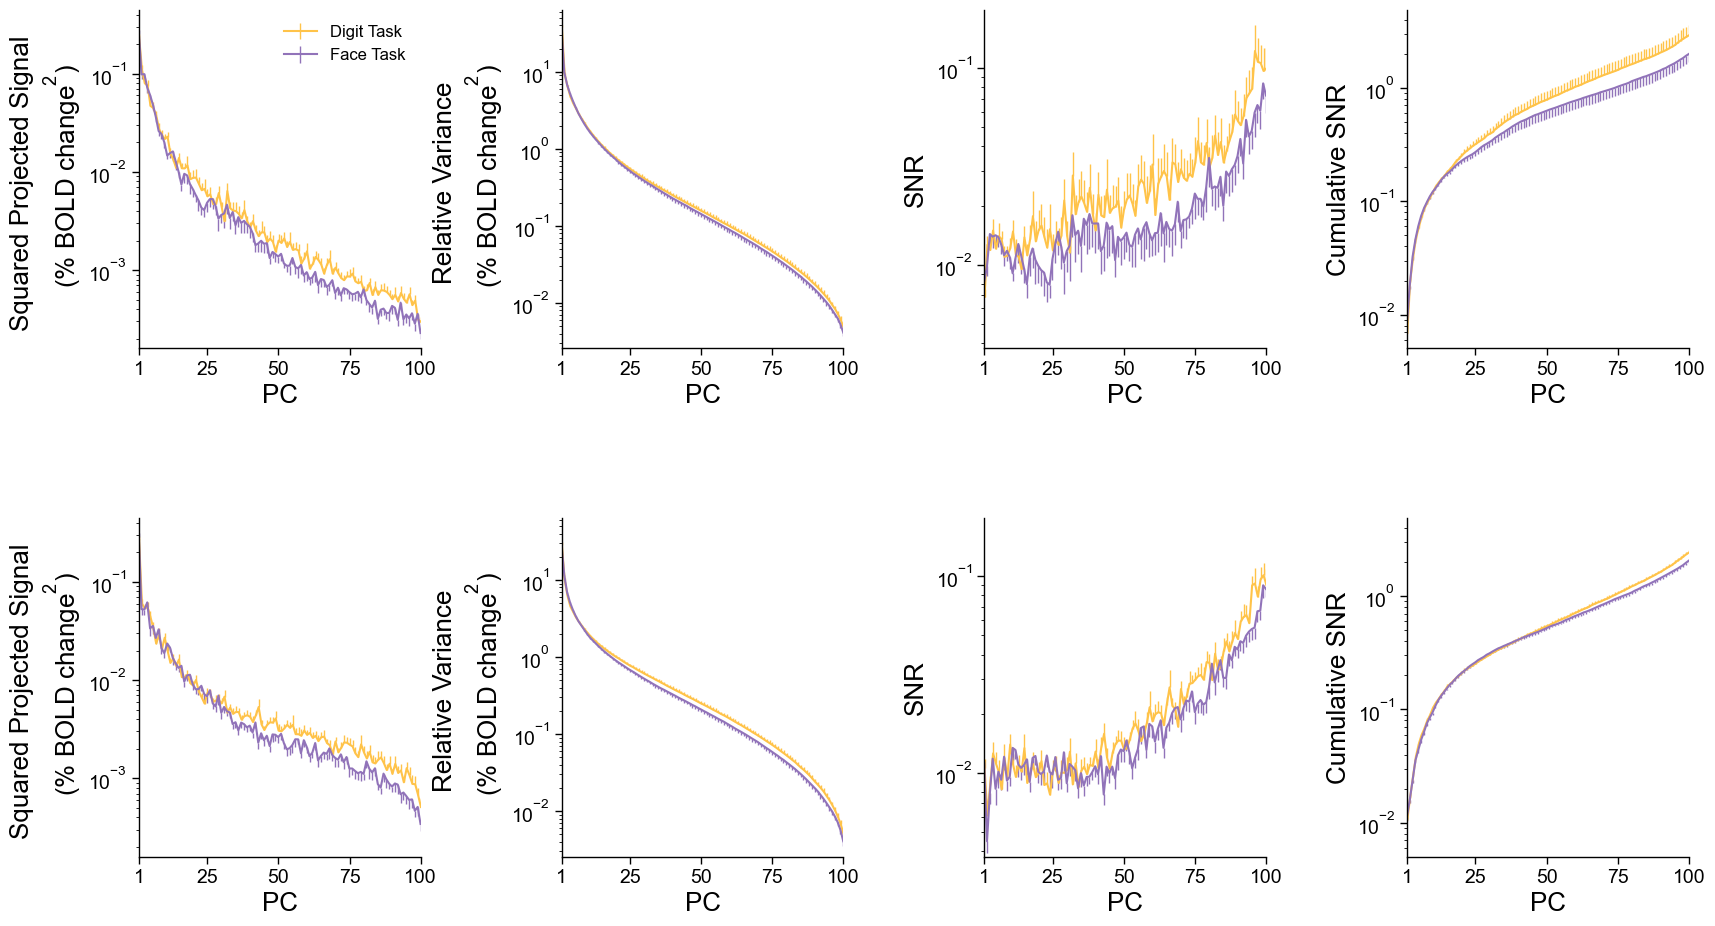

In [5]:
# plot
set_figure()
fig,axes = plt.subplots(2,4,figsize=(20,11),gridspec_kw={'wspace': 0.5,'hspace': 0.5},sharex='row',sharey='col')
ylbls = ['Squared Projected Signal \n (% BOLD change$^2$)','Relative Variance \n (% BOLD change$^2$)', 'SNR', 'Cumulative SNR']
xlbls = 'PC'
ytks = [[0,150,50]]
xtks = [[1,100,2]]
for f_i in range(4):
    for j in range(len(roi_sel)):
        set_ax(axes[j,f_i])
        for ng in range(ntask):
            data_e = np.zeros([2,100])
            if f_i==10:
                [data_m,data_e[ng,:],bsample] = stat_m_e(data_all[:,:,ng,j,f_i],mtype='mean',etype='sem')
            else:
                [data_m,data_e[1-ng,:],bsample] = stat_m_e(data_all[:,:,ng,j,f_i],mtype='mean',etype='sem')
            axes[j,f_i].errorbar(np.arange(1,nvertex+1)+(1-2*ng)*0.07,data_m,data_e,label=roi_labels[roi_i],
                            marker='none',linewidth=1.5,color=cms[ng], #[0.5,0.5,0.5]
                            ecolor=cms[ng],elinewidth=1, capsize=0, capthick=0,alpha=1)
            axes[j,f_i].set_yscale('log')
            axes[j,f_i].set_ylabel(ylbls[f_i])
            axes[j,f_i].set_xlabel(xlbls)
            axes[j,f_i].set_xlim([1,100])
            axes[j,f_i].set_xticks([1,25,50,75,100])
            axes[j,f_i].tick_params(axis='both', width=1, direction='out',labelsize=14) # , bottom=False

axes[0,0].legend(task,fontsize = 12, framealpha=0,loc='upper right')
fig.savefig('fig7.pdf', bbox_inches='tight')
